# Group Assignment #3: Building Upon and Cleaning Midterm Assignment 
## Project: Who's Most at Risk? Social Demographics and Traffic Collisions in the City of Los Angeles
**Author: Gema Martinez Castillo** 

Our research will evaluate different socio-demographic characteristics, such as median household income, race and ethnicity, and age to explore which communities are most susceptible to traffic collisions in the City of Los Angeles. This notebook will clean up the original midterm assignment and add on to our data evaluation.

## Static Map: Median Income in LA 

In [104]:
# importing pandas for data exploration 
import pandas as pd
import geopandas as gpd

# importing for plots and tables 
import matplotlib.pyplot as plt
import contextily as ctx

#importing for interactive plots 
import plotly.express as px

In [105]:
# upload acs 2015-2019
income = pd.read_csv('Data/R13808337_SL140.csv')

In [106]:
#converting FIPS, STATE, and COUNTY from integer to string 
income = pd.read_csv(
    'Data/R13808337_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [107]:
#deleting columns with null values
income = income.dropna(axis=1,how="all")

In [108]:
#checking refined columns
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geo_FIPS       2346 non-null   object 
 1   Geo_GEOID      2346 non-null   object 
 2   Geo_NAME       2346 non-null   object 
 3   Geo_QName      2346 non-null   object 
 4   Geo_STUSAB     2346 non-null   object 
 5   Geo_SUMLEV     2346 non-null   int64  
 6   Geo_GEOCOMP    2346 non-null   int64  
 7   Geo_FILEID     2346 non-null   object 
 8   Geo_LOGRECNO   2346 non-null   int64  
 9   Geo_STATE      2346 non-null   object 
 10  Geo_COUNTY     2346 non-null   object 
 11  Geo_TRACT      2346 non-null   int64  
 12  SE_A14006_001  2310 non-null   float64
dtypes: float64(1), int64(4), object(8)
memory usage: 238.4+ KB


In [109]:
#keeping necessary columns, informed by the codebook
columns_to_keep = ['Geo_FIPS',
                   'SE_A14006_001']

income = income[columns_to_keep]

In [110]:
# identifying columns in new dataset
columns = list(income) 
columns

['Geo_FIPS', 'SE_A14006_001']

In [111]:
#remaning columns
income.columns = ['FIPS',
'Median Household Income']

In [112]:
# merging to City of LA census tracts 
cityofla=gpd.read_file('Data/cityLA.zip')

In [113]:
# adding FIPS column to prepare data for merge 
cityofla['FIPS'] = '06' + '037' + cityofla['TRACTCE']

In [114]:
# merging shapefile and income data
la_income =cityofla.merge(income,on="FIPS")

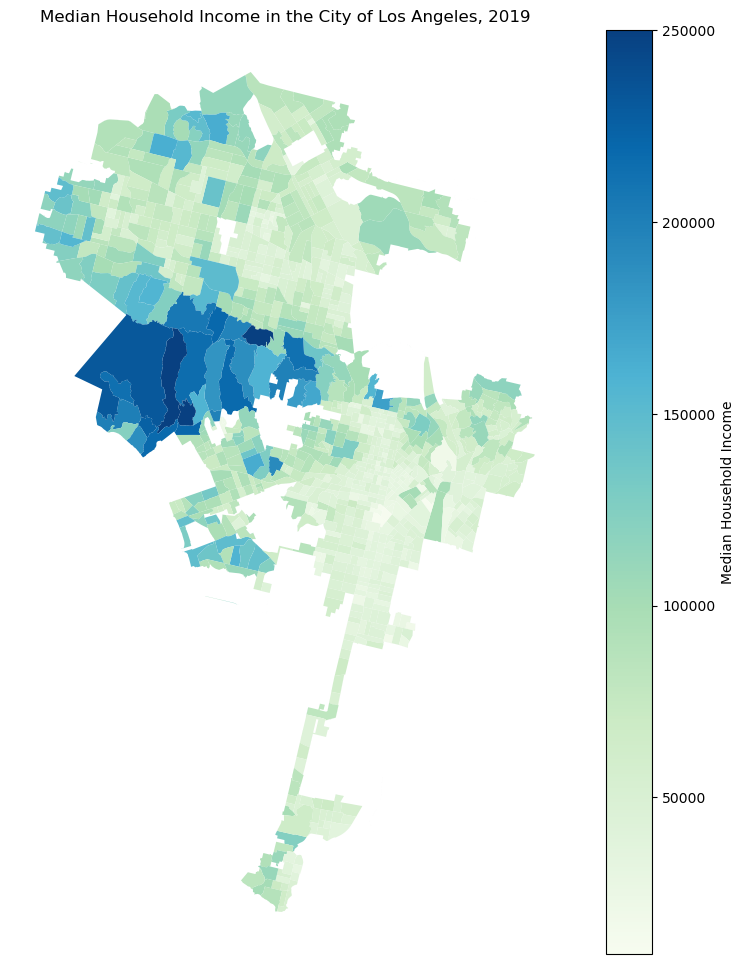

In [115]:
# mapping median household income in City of LA

fig,ax = plt.subplots(figsize=(12,12))

la_income.plot(ax=ax,column='Median Household Income',legend=True,cmap='GnBu',
             legend_kwds={"label": "Median Household Income", "orientation": "vertical"})

ax.axis('off')
ax.set_title('Median Household Income in the City of Los Angeles, 2019')
plt.savefig('demo.png', transparent=True)

## Static Map: HIN and Median Income Overlay

In [116]:
#importing SCAG HIN GeoJson 
scag_hin = gpd.read_file('Data/High_Injury_Network_SCAG.geojson')

In [117]:
# identifying City of LA  naming convention
scag_hin['CITY'].value_counts()

CITY
Los Angeles         1490
Unincorporated      1060
Long Beach           172
Riverside             94
Santa Ana             91
                    ... 
Lomita                 1
Hidden Hills           1
Westlake Village       1
South Pasadena         1
La Habra Heights       1
Name: count, Length: 183, dtype: int64

In [118]:
#creating new variable only for City of LA hin segements
LA_hin = scag_hin[scag_hin.CITY == 'Los Angeles']

In [119]:
la_income = la_income.to_crs('EPSG:4326')
print("Original CRS:", la_income.crs)

Original CRS: EPSG:4326


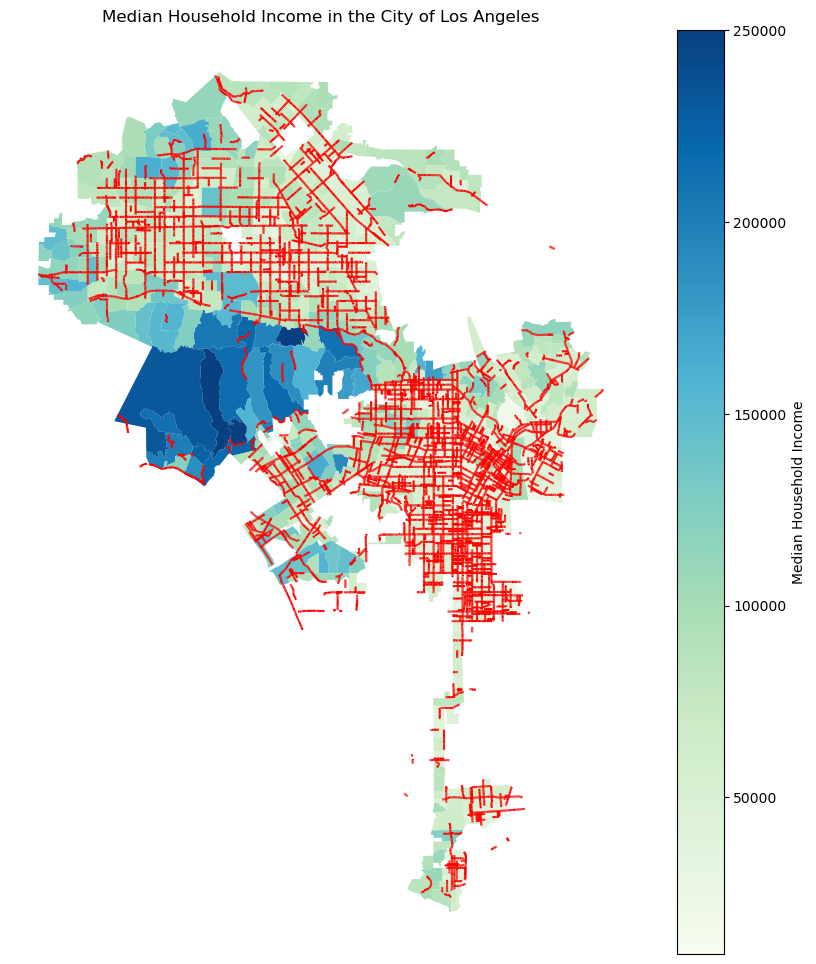

In [120]:
#mapping HIN and Median Income Overlay 
fig,ax = plt.subplots(figsize=(12,12))

la_income.plot(ax=ax,column='Median Household Income',legend=True,cmap='GnBu',
             legend_kwds={"label": "Median Household Income", "orientation": "vertical"})


LA_hin.plot(ax=ax, 
            color='red', 
            markersize= 0.5)


ax.axis('off')
ax.set_title('Median Household Income in the City of Los Angeles')

plt.savefig('HH Income and HIN.png', transparent=True)

## Histogram

In [121]:
fig = px.histogram(la_income, x="Median Household Income", 
                   title='Median Household Income Distribution in the City of Los Angeles, 2019',
                   labels={'Median Household Income': 'Median Household Income ($)'},
                           color_discrete_sequence=['#ff7f0e'],
                  nbins=15)
fig.update_traces(marker_line_width=0, textposition='outside')
fig.update_layout(
    xaxis_title_text='Median Household Income ($)', # xaxis label
    yaxis_title_text='Count', # yaxis label
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)'
)

fig.show()

## Spatial Join for HIN and City of LA Census Tracts

In [122]:
# conduct a spatial join (i.e. assign each HIN segement to the census tract it is in)
cityofla = cityofla.to_crs('EPSG:4326')
print("Original CRS:", cityofla.crs)

HIN_by_censustract = gpd.sjoin(cityofla, LA_hin) #Spatial join Points to polygons
HIN_by_censustract

Original CRS: EPSG:4326


,GISJOIN,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,...,FATALITY_VICTIM,SEVERE_INJURY_VICTIM,VICTIM_COUNT,HIN_AUTO,HIN_PED,HIN_BIKE,HIN_ALL,TRANSIT_AREA,EQUITY_AREA,YEAR
0,G0600370101110,06,037,101110,06037101110,1011.10,Census Tract 1011.10,G5020,S,1142401.0,...,3.0,6.0,9.0,Yes,Yes,Yes,Yes,No,Yes,2022
0,G0600370101110,06,037,101110,06037101110,1011.10,Census Tract 1011.10,G5020,S,1142401.0,...,1.0,0.0,1.0,Yes,No,No,Yes,No,Yes,2022
1,G0600370101122,06,037,101122,06037101122,1011.22,Census Tract 1011.22,G5020,S,2644045.0,...,0.0,0.5,0.5,Yes,No,No,Yes,No,Yes,2022
2,G0600370101210,06,037,101210,06037101210,1012.10,Census Tract 1012.10,G5020,S,650690.0,...,0.0,4.5,4.5,Yes,Yes,No,Yes,No,Yes,2022
2,G0600370101210,06,037,101210,06037101210,1012.10,Census Tract 1012.10,G5020,S,650690.0,...,3.0,6.0,9.0,Yes,Yes,Yes,Yes,No,Yes,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,G0600370980031,06,037,980031,06037980031,9800.31,Census Tract 9800.31,G5020,S,12641938.0,...,0.5,0.5,1.0,Yes,No,No,Yes,No,Yes,2022
1166,G0600370980031,06,037,980031,06037980031,9800.31,Census Tract 9800.31,G5020,S,12641938.0,...,0.0,1.0,1.0,Yes,No,No,Yes,No,Yes,2022
1166,G0600370980031,06,037,980031,06037980031,9800.31,Census Tract 9800.31,G5020,S,12641938.0,...,0.0,2.0,2.0,No,Yes,Yes,Yes,No,Yes,2022
1166,G0600370980031,06,037,980031,06037980031,9800.31,Census Tract 9800.31,G5020,S,12641938.0,...,0.0,4.0,4.0,No,Yes,Yes,Yes,No,Yes,2022


In [123]:
# count the number of records per census tract
HIN_counts = HIN_by_censustract.value_counts('NAME').reset_index(name='HIN_count')
HIN_counts

,NAME,HIN_count
0,2260.02,23
1,9800.28,19
2,2060.31,19
3,2110,17
4,2240.20,15
...,...,...
1011,9800.02,1
1012,9800.19,1
1013,5409.02,1
1014,5435.01,1


In [124]:
# add the count to the City of LA censis tracts, merge is used for tables
cityofla = cityofla.merge(HIN_counts, how='left', on='NAME')
cityofla

,GISJOIN,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Le_1,Shape_Area,geometry,FIPS,HIN_count
0,G0600370101110,06,037,101110,06037101110,1011.10,Census Tract 1011.10,G5020,S,1142401.0,0.0,+34.2594737,-118.2929869,4585.520052,4585.520052,1.142400e+06,"POLYGON ((-118.29792 34.26322, -118.29696 34.2...",06037101110,2.0
1,G0600370101122,06,037,101122,06037101122,1011.22,Census Tract 1011.22,G5020,S,2644045.0,0.0,+34.2677213,-118.2901465,9652.233049,9652.233049,2.644046e+06,"POLYGON ((-118.27742 34.2599, -118.27746 34.25...",06037101122,1.0
2,G0600370101210,06,037,101210,06037101210,1012.10,Census Tract 1012.10,G5020,S,650690.0,0.0,+34.2529724,-118.2907309,3671.776951,3671.776951,6.506895e+05,"POLYGON ((-118.28593 34.25589, -118.28593 34.2...",06037101210,3.0
3,G0600370101220,06,037,101220,06037101220,1012.20,Census Tract 1012.20,G5020,S,698886.0,0.0,+34.2516083,-118.2816328,3870.684865,3870.684865,6.988841e+05,"POLYGON ((-118.28498 34.25589, -118.28449 34.2...",06037101220,2.0
4,G0600370101300,06,037,101300,06037101300,1013,Census Tract 1013,G5020,S,2581214.0,0.0,+34.2487733,-118.2709978,8985.054807,8980.005006,2.580326e+06,"POLYGON ((-118.26527 34.25238, -118.26527 34.2...",06037101300,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,G0600370980026,06,037,980026,06037980026,9800.26,Census Tract 9800.26,G5020,S,13865627.0,35273.0,+34.2734804,-118.2633014,31242.386095,31240.015582,1.389320e+07,"POLYGON ((-118.29208 34.29323, -118.29061 34.2...",06037980026,NaN
1164,G0600370980028,06,037,980028,06037980028,9800.28,Census Tract 9800.28,G5020,S,17299723.0,2367417.0,+33.9423871,-118.4160617,25220.098297,25269.399427,1.717798e+07,"POLYGON ((-118.41351 33.95441, -118.41347 33.9...",06037980028,19.0
1165,G0600370980030,06,037,980030,06037980030,9800.30,Census Tract 9800.30,G5020,S,4248789.0,990973.0,+33.9096235,-118.4094782,9017.881815,653.697955,6.943901e+00,"POLYGON ((-118.42589 33.91632, -118.42718 33.9...",06037980030,NaN
1166,G0600370980031,06,037,980031,06037980031,9800.31,Census Tract 9800.31,G5020,S,12641938.0,13284889.0,+33.7390903,-118.2585391,81115.354326,78825.509210,1.261656e+07,"MULTIPOLYGON (((-118.24533 33.76374, -118.2437...",06037980031,8.0


Text(0.5, 1.0, 'Miles of HIN per Census Tract')

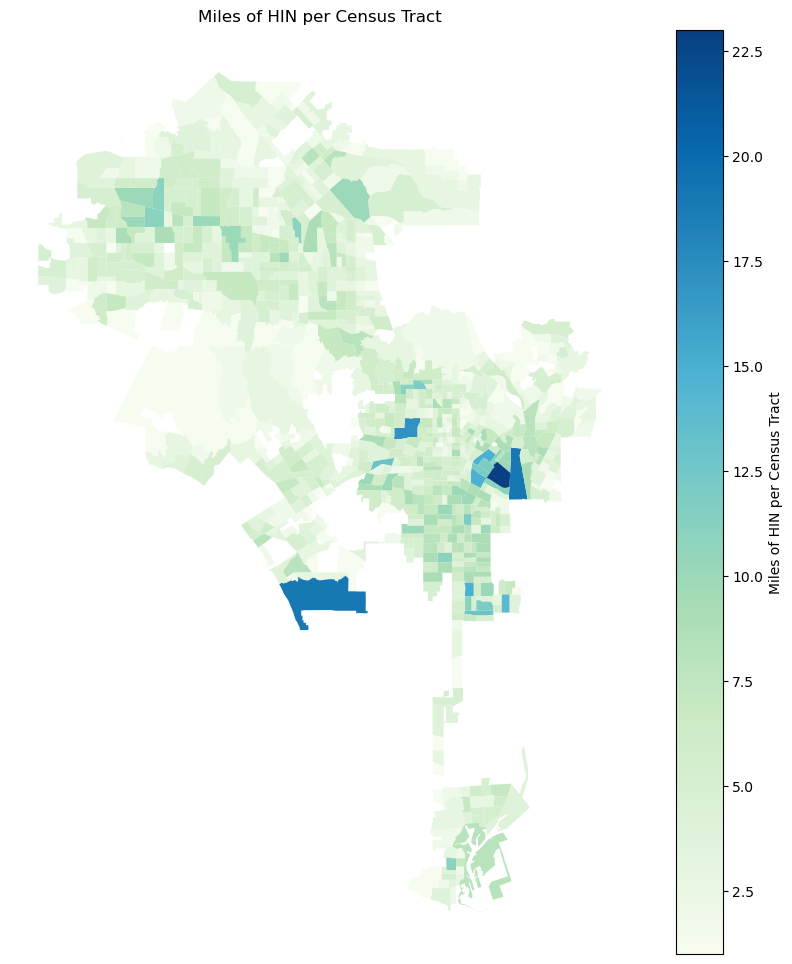

In [125]:
#creating map 
fig,ax = plt.subplots(figsize=(12,12))

cityofla.plot(ax=ax,column='HIN_count',legend=True,cmap='GnBu',
             legend_kwds={"label": "Miles of HIN per Census Tract", "orientation": "vertical"})


ax.axis('off')
ax.set_title('Miles of HIN per Census Tract')

In [127]:
# identifying the top 10 census tracts
cityofla.nlargest(10, 'HIN_count')

,GISJOIN,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Le_1,Shape_Area,geometry,FIPS,HIN_count
702,G0600370226002,06,037,226002,06037226002,2260.02,Census Tract 2260.02,G5020,S,2568345.0,0.0,+34.0326185,-118.2477706,6522.788473,6522.788473,2.568346e+06,"POLYGON ((-118.23861 34.03498, -118.23881 34.0...",06037226002,23.0
532,G0600370206031,06,037,206031,06037206031,2060.31,Census Tract 2060.31,G5020,S,4592040.0,138116.0,+34.0320283,-118.2331623,11329.467188,11312.199088,4.719628e+06,"POLYGON ((-118.22853 34.05298, -118.22858 34.0...",06037206031,19.0
1164,G0600370980028,06,037,980028,06037980028,9800.28,Census Tract 9800.28,G5020,S,17299723.0,2367417.0,+33.9423871,-118.4160617,25220.098297,25269.399427,1.717798e+07,"POLYGON ((-118.41351 33.95441, -118.41347 33.9...",06037980028,19.0
576,G0600370211000,06,037,211000,06037211000,2110,Census Tract 2110,G5020,S,2656761.0,0.0,+34.0677859,-118.3317418,7666.034986,7666.034986,2.656766e+06,"POLYGON ((-118.32267 34.0762, -118.32161 34.07...",06037211000,17.0
545,G0600370207710,06,037,207710,06037207710,2077.10,Census Tract 2077.10,G5020,S,1101222.0,0.0,+34.0468663,-118.2616828,5245.425373,5245.425373,1.101223e+06,"POLYGON ((-118.25178 34.04877, -118.25311 34.0...",06037207710,15.0
693,G0600370224020,06,037,224020,06037224020,2240.20,Census Tract 2240.20,G5020,S,1232335.0,0.0,+34.0304827,-118.2686569,4644.382512,4644.382512,1.232337e+06,"POLYGON ((-118.26 34.03113, -118.26008 34.0310...",06037224020,15.0
803,G0600370240500,06,037,240500,06037240500,2405,Census Tract 2405,G5020,S,812533.0,0.0,+33.9469270,-118.2756654,3742.970884,3742.970884,8.125281e+05,"POLYGON ((-118.27169 33.95192, -118.27169 33.9...",06037240500,15.0
821,G0600370242700,06,037,242700,06037242700,2427,Census Tract 2427,G5020,S,1015217.0,0.0,+33.9363535,-118.2426485,4391.388477,4391.388477,1.015217e+06,"POLYGON ((-118.24321 33.94322, -118.24295 33.9...",06037242700,14.0
651,G0600370218300,06,037,218300,06037218300,2183,Census Tract 2183,G5020,S,891389.0,9421.0,+34.0427467,-118.3548171,5263.773063,5263.773063,9.008062e+05,"POLYGON ((-118.36091 34.04386, -118.35977 34.0...",06037218300,13.0
808,G0600370241001,06,037,241001,06037241001,2410.01,Census Tract 2410.01,G5020,S,904093.0,2395.0,+33.9296426,-118.2679732,5499.681283,5493.274356,9.061383e+05,"POLYGON ((-118.27388 33.93102, -118.27064 33.9...",06037241001,13.0


## Team Member Contributions

**Gema** 
- Spatial join for HIN and City of LA census tract data & ranked top 10 census tracts with the most HIN miles 

**Emily**
- Funtion/loop for race/ethnicity 

**Veronica**
- Funtion/loop for age
